## Citation
#### Devlin, J., Chang, M.-W., Lee, K., & Toutanova, K. (2019). BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. arXiv:1810.04805. https://doi.org/10.48550/arXiv.1810.04805

#### This notebook is a personal explanation and walkthrough of the paper BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding. All credit for the original research goes to the authors listed above.

**Image Attribution**

#### Unless otherwise noted, all figures in this notebook are either original or sourced from Devlin et al., 2019 – BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding

# BERT

#### BERT stands for Bidirectional Encoders Representations from Transformers

#### If you know Transformers, this paper would be easier to understand. To give a small recap, Transformers consists of Encoder and Decoder. Encoder is used to encode the input and understand the relationship between the current word with the previous words of the sentence before it. Decoder is used to take this information and then decode or predict the next token. Hence, Transformers are Language Models.

#### BERT uses only the encoder part of the Transformer. Let's see the BERT Architecture.

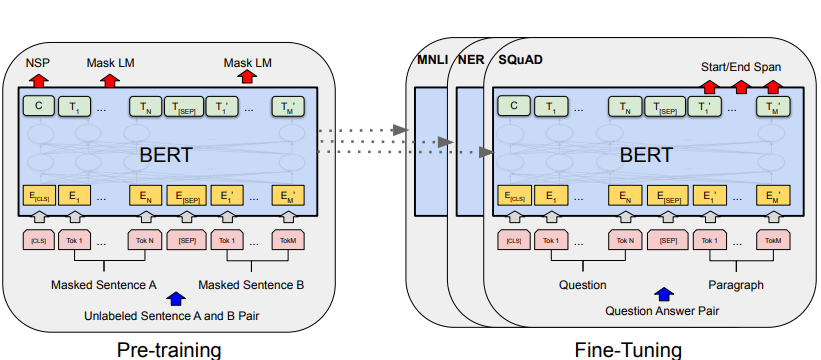

In [2]:
%matplotlib inline
from IPython.display import Image
Image('Images/pre-training and fine-tuning.png')

#### To understand why BERT uses this architecture, we need to understand about what were/are the methods available before BERT.

# Brief introduction about the approaches available:

## 1) Unsupervised Feature-based Approaches
#### These models extract features from the input text using pre-trained models like Word2Vec. We do not update the weights or parameters after training on a particular task. These extracted features are used as inputs to a seperate model like SVM for doing a particular task like Sentiment Analysis, etc. 

## 2) Unsupervised Fine-tuning Approaches
#### These models are pre-trained using unlabelled data and then it can be fine-tuned using labelled data for tasks like Sentiment Analysis, NER, etc.

# Which approach does BERT use? 

#### BERT uses Unsupervised Fine-tuning Approach. BERT uses two steps in it's architecture. MLM and NSP (will be discussed in the later sections)

#### Now, let's see how BERT works from input to output.

# Input Representation

#### BERT uses specific input representation because it needs to handle single sentence and pair sentence as inputs. It does so by adding the token embedding with additional embeddings to distinguish between the single sentence and pair sentence.

#### Let's see the Input Representation diagram given in the paper.

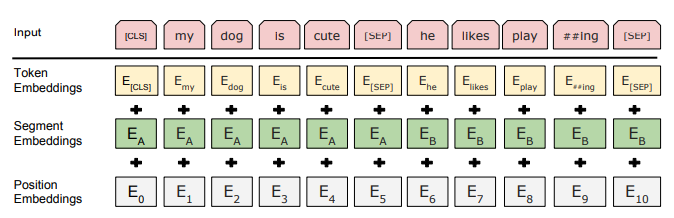

In [2]:
%matplotlib inline
from IPython.display import Image
Image('Images/input representation.png')

#### BERT uses three types of embeddings: Token Embedding, Segmentation Embedding and Position Embedding.

# 1) Token Embedding
#### This is the usual type of embedding where the input gets converted to vectors as seen in Transformers. Only difference in BERT is that it uses two special tokens called [CLS] and [SEP]. BERT uses WordPiece Embedding for this task.
#### [CLS] stands for Classification. It is at the start of each input. The final hidden state of this token is used for classification tasks like Sentiment Analysis.
#### [SEP] stands for Separator and is used to seperate two sentences like Question Answer pair or to mark the end of the single sentence.

# 2) Segmentation Embedding
#### This is used to label the separated segments. [SEP] in token embedding seperates the token. If we see the example above, E_A and E_B are two segments.

# 3) Position Embedding
#### This is used to capture the order of the tokens. Transformers have no built-in understanding of word order. For example, assume the input is "The cat is on the mat", the Transformer will treat the sentence in any order as the same as it doesn't have positional context of the words. So, "The cat on is mat" will be treated similar to the original input. Hence, Position Emebedding is added so the order of the tokens will be there in the learning phase. This allows BERT to capture relative and absolute positions. 


#### The final input representation is the sum of Token Embedding, Segmentation Embedding, and Position Embedding.

# BERT Pre-Training Process


##### Now we have the input representation. We have to pre-train the BERT model. To do this, BERT uses two steps: MLM and NSP (as mentioned above)

# 1) Masked Language Model (MLM)
##### BERT uses encoder only part of the Transformer. BERT uses Bi-directional learning meaning it can have deep understanding of the sentence. To do this, BERT uses MLM. It is masking some tokens using the [MASK] tag so that the output is the prediction of this [MASK] token. This is useful as the model will understand the context of the sentence to predict the [MASK] token.
##### For Example, if the sentence is "The Earth is in the [MASK] System", then the model should learn the context and give the prediction for [MASK] token as "Solar".
##### But having [MASK] token in all the sentences makes it too dependent on the [MASK] token and [MASK] tokens does not appear during fine-tuning. Let's see how this is solved.

##### BERT masks only 15% of the sentences during training. Out of this:
##### a) 80% of the time, [MASK] token is used.
##### b) 10% of the time, the token is unchanged.
##### c) 10% of the time, the token is randomly changed.

##### This method helps avoid overfitting by preventing the model from becoming overly dependent on the [MASK] token.

# 2) Next Sentence Prediction (NSP)

#### NSP is used for understanding the relationship between two sentences. This is useful in tasks like Question Answering (QA), Natural Language Inference (NLI).
#### BERT learns to predict whether B is the actual next sentence or not. To do this, it uses the [CLS] token’s final hidden state, which acts like a summary of the entire input. This gives BERT a strong understanding of how sentences are connected. That’s why it helps so much with tasks like QA and NLI.
#### To prevent overfitting, 50% of the sentences are related to each other (labelled IsNext) and 50% of the sentences are unrelated (labelled NotNext). 

# BERT Fine-Tuning

#### After Pre-Training, the next task is to fine-tune the BERT model. This is to perform specific tasks like Sentiment Analysis, Named Entity Recognition (NER), Question Answering (QA). This process involves changing the parameters of the BERT Pre-trained model.
#### Since BERT uses Self-Attention, it lets the senteces to "see" and learn how the senteces are related without any extra steps. Hence, BERT can understand Single sentence or sentence pairs. 

### Examples of how BERT’s input format applies to different tasks:
#### a) Text classification (like sentiment analysis): just one sentence + [CLS].

#### b) Natural Language Inference (does one sentence logically follow from another?): sentence A + sentence B.

#### c) Question Answering: question + passage.

#### d) Paraphrase detection: sentence A + sentence B.

#### e) Sequence tagging (like named entity recognition): sentence + per-token labels.

#### At the output, the [CLS] token's final embedding is used for classification tasks.

# Experiments

# 1) GLUE (General Language Understanding Evaluation)
#### GLUE is a benchmark which has a set of Natural Language tasks like Sentiment Analysis.
#### To perform GLUE tasks, BERT's fine-tuning process is used. The [CLS] token is used at the beginning of each sentence or sentence pair and final hidden vector is used as the summary of this token. It is denoted by C.
#### A task-specific classification is used on top. This is a Weight Matrix (W) of size (K, H) where K is the size of the output layer and H is the hidden size of BERT.
#### Softmax Cross-Entropy Loss function is used. This is given by the formula: log(softmax(CW^T)).

# 2) Squad v1.1 (Stanford Question Answering Dataset)
#### This is a collection of 100k Question Answer pairs. Given a question and answer pair, task is to compute Start Token and End Token.
#### For example, the input for BERT is "[CLS] Where is Earth? [SEP] Earth is in the Solar System [SEP]". Then the Start Token S is "Solar" and the End Token E is "System". We take the Span, that is, from Start Token to End Token. In this example, it is "Solar System". 
#### We do this by computing the softmax of a token with every token. The formula is: 

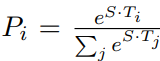

In [1]:
%matplotlib inline
from IPython.display import Image
Image('Images/Start Token Formula.png')

#### Here, P_i is the probability that the ith Token is the Start token. If we observe the formula, we realize that it is actually the Softmax function. So, the Start Token is the token which has the highest probability.

#### We do the same to compute the End Token. Same formula is used just instead of Vector S, Vector E is used.

#### Now we have the Start and End Token, we have to compute the answer, which is the Span. Span is basically from Start Token to End Token (both inclusive)

# 3) SQuAD v2.0
#### This is the same as SQuAD v1.1, only difference is that this version takes care of the case when there is no Answers for the question asked. In that case, the [CLS] token is considered as both the Start Token and End Token. So this would mean that the model predicted the response as "No answer".

# 4) SWAG (Situations With Adversarial Generations)
#### SWAG is a dataset which consists of 113k sentence-pair completion.

#### For fine-tuning, question has four possible sentence continuations. Four seperate input sequences are formed. Each input is in the form: [CLS] Sentence A [SEP] Sentence B [SEP] where Sentence A is the context and Sentence B is one of the four choices.
#### BERT produces a representation for [CLS]. This is like a summary of each input. Then, the dot product between the [CLS] matrix (C) and the Weight Matrix (Scoring Matrix) is taken. We would then have 4 scores (1 for each sentence). We can then apply softmax to get a probability distribution. The highest probability sentence is the model's prediction.

# Ablation Studies
#### Ablation here is removing certain components from the model and check their performance

# 1) Effect of Pre-training Tasks
## a) No NSP
#### Only MLM is used. This affected the performance in tasks like SQuAD.
#### Hence, NSP is important to understand the relationship between two sentences.

## b) LTR and No NSP (Left-to-Right only, no NSP)
#### Performance is affected in tasks like SQuAD because to answer the question, we need to understand the context from both directions (Left to Right and Right to Left).
#### Hence, NSP is required and both left and right context is needed to answer tasks like SQuAD.

# 2) Effect of Model Size
#### BERT LARGE (340M parameters) model outperformed BERT BASE model (110M parameter) across the GLUE tasks. This is because the model already learnt to understand the context. 

# 3) Feature-based Approach with BERT
#### BERT is generally fine-tuned. In the feature-based approach, BERT’s weights are kept frozen. We extract output features (hidden states) from BERT and feed them into another model like a Bi-LSTM. This is useful for saving computation and when a custom architecture (LSTM) is needed. Performance is slightly lower than full fine-tuning but still strong.

# Conclusion
#### BERT learns the given sentence by reading in both directions and predicting missing words and sentence relationships. MLM is used for predicting the masked tokens and NSP is used to understand the relationship between two sentences.

##### Used in: Google Search, chatbots, etc.

##### BERT is a major milestone in NLP and is the foundation for many modern AI models.